In [99]:
import pandas as pd

In [100]:
import numpy as np

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
df = pd.read_csv("ads.csv")

In [104]:
df["Region"].unique()

array(['Europe', 'Asia', 'North America'], dtype=object)

In [105]:
df.head()

,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_CTR,Ad_CPC,Ad_Spend
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,2024-10-06,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,2024-10-29,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,2024-04-04,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40
3,28fb67c8-e8c0-447a-841c-f760730de0eb,Customer_17206,Product_220,2024-08-25,125,0.20,980.26,12,355,0.03,Clothing,Europe,0.0444,0.44,19.54
4,8bee087a-a8a9-45bb-89d7-04d1710f1b00,Customer_16033,Product_358,2024-05-05,132,0.07,803.76,44,355,0.12,Books,North America,0.1270,0.53,67.31


In [106]:
drop = ["Transaction_ID","Customer_ID","Product_ID"]

In [107]:
df = df.drop(drop, axis = 1)

In [108]:
df.head()

,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_CTR,Ad_CPC,Ad_Spend
0,2024-10-06,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90
1,2024-10-29,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56
2,2024-04-04,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40
3,2024-08-25,125,0.20,980.26,12,355,0.03,Clothing,Europe,0.0444,0.44,19.54
4,2024-05-05,132,0.07,803.76,44,355,0.12,Books,North America,0.1270,0.53,67.31


In [109]:

df.isna().sum()

Transaction_Date    0
Units_Sold          0
Discount_Applied    0
Revenue             0
Clicks              0
Impressions         0
Conversion_Rate     0
Category            0
Region              0
Ad_CTR              0
Ad_CPC              0
Ad_Spend            0
dtype: int64

In [110]:
cat_col = ["Category","Region"]

In [111]:
df = pd.get_dummies(df,columns = cat_col)

In [112]:
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])

In [113]:
df.head()

,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Ad_CTR,Ad_CPC,Ad_Spend,Category_Books,Category_Clothing,Category_Electronics,Category_Home Appliances,Category_Toys,Region_Asia,Region_Europe,Region_North America
0,2024-10-06,134,0.14,305.54,11,65,0.17,0.0180,0.55,9.90,False,False,True,False,False,False,True,False
1,2024-10-29,109,0.30,1102.19,15,201,0.07,0.1589,0.40,63.56,False,False,False,True,False,True,False,False
2,2024-04-04,116,0.04,471.29,16,199,0.08,0.0596,1.50,89.40,False,False,False,False,True,True,False,False
3,2024-08-25,125,0.20,980.26,12,355,0.03,0.0444,0.44,19.54,False,True,False,False,False,False,True,False
4,2024-05-05,132,0.07,803.76,44,355,0.12,0.1270,0.53,67.31,True,False,False,False,False,False,False,True


In [114]:
df["day"] = df["Transaction_Date"].dt.day

In [115]:
df["month"] = df["Transaction_Date"].dt.month

In [116]:
df["year"] = df["Transaction_Date"].dt.year

In [117]:
df.drop("Transaction_Date",axis = 1,inplace = True)

In [118]:
df.head()

,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Ad_CTR,Ad_CPC,Ad_Spend,Category_Books,Category_Clothing,Category_Electronics,Category_Home Appliances,Category_Toys,Region_Asia,Region_Europe,Region_North America,day,month,year
0,134,0.14,305.54,11,65,0.17,0.0180,0.55,9.90,False,False,True,False,False,False,True,False,6,10,2024
1,109,0.30,1102.19,15,201,0.07,0.1589,0.40,63.56,False,False,False,True,False,True,False,False,29,10,2024
2,116,0.04,471.29,16,199,0.08,0.0596,1.50,89.40,False,False,False,False,True,True,False,False,4,4,2024
3,125,0.20,980.26,12,355,0.03,0.0444,0.44,19.54,False,True,False,False,False,False,True,False,25,8,2024
4,132,0.07,803.76,44,355,0.12,0.1270,0.53,67.31,True,False,False,False,False,False,False,True,5,5,2024


In [119]:
num_cols = ["Units_Sold","Discount_Applied","Revenue","Clicks","Impressions","Conversion_Rate","Ad_CTR","Ad_CPC","Ad_Spend","day","month","year"]

### Not needed if you dont want to the scaler thing

In [120]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

In [121]:
df_sca = pd.DataFrame(X_scaled,columns = num_cols)

In [122]:
df_final = pd.concat([df_sca, df.drop(columns=num_cols)], axis=1)


In [149]:
df["Category_Books"] = df["Category_Books"].astype("int")

In [150]:
df.head()

,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Ad_CTR,Ad_CPC,Ad_Spend,Category_Books,Category_Clothing,Category_Electronics,Category_Home Appliances,Category_Toys,Region_Asia,Region_Europe,Region_North America,day,month,year
0,134,0.14,305.54,11,65,0.17,0.0180,0.55,9.90,0,False,True,False,False,False,True,False,6,10,2024
1,109,0.30,1102.19,15,201,0.07,0.1589,0.40,63.56,0,False,False,True,False,True,False,False,29,10,2024
2,116,0.04,471.29,16,199,0.08,0.0596,1.50,89.40,0,False,False,False,True,True,False,False,4,4,2024
3,125,0.20,980.26,12,355,0.03,0.0444,0.44,19.54,0,True,False,False,False,False,True,False,25,8,2024
4,132,0.07,803.76,44,355,0.12,0.1270,0.53,67.31,1,False,False,False,False,False,False,True,5,5,2024


In [124]:
df_final

,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Ad_CTR,Ad_CPC,Ad_Spend,day,month,year,Category_Books,Category_Clothing,Category_Electronics,Category_Home Appliances,Category_Toys,Region_Asia,Region_Europe,Region_North America
0,0.114160,-0.113869,-0.577945,-0.939411,-1.339822,-0.077904,-1.587194,-0.912610,-1.155855,-1.108602,1.007132,0.270412,False,False,True,False,False,False,True,False
1,-0.389065,1.731759,1.281805,-0.661872,-0.378459,-0.354770,0.983693,-1.185710,-0.539183,1.505396,1.007132,0.270412,False,False,False,True,False,True,False,False
2,-0.248162,-1.267387,-0.191008,-0.592488,-0.392597,-0.327083,-0.828153,0.817024,-0.242224,-1.335906,-0.731371,0.270412,False,False,False,False,True,True,False,False
3,-0.067001,0.578241,0.997164,-0.870026,0.710142,-0.465516,-1.105495,-1.112883,-1.045071,1.050787,0.427631,0.270412,False,True,False,False,False,False,True,False
4,0.073902,-0.921332,0.585131,1.350283,0.710142,-0.216337,0.401640,-0.949023,-0.496087,-1.222254,-0.441620,0.270412,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.019964,-0.459925,-0.695672,1.142129,1.226168,-0.271710,0.042190,0.780610,0.555336,0.596179,-0.731371,0.270412,False,False,True,False,False,False,True,False
99996,0.999835,-0.344573,1.749654,-1.286334,0.766693,-0.493203,0.208230,-1.258536,-0.788105,0.141571,0.717382,0.270412,True,False,False,False,False,False,False,True
99997,1.684220,1.270352,-0.144155,-1.355719,1.162548,-0.520889,0.337778,-1.549843,-0.985771,0.823483,1.007132,0.270412,False,False,True,False,False,False,False,True
99998,1.040093,-0.690628,0.106916,1.142129,-1.714470,8.920239,0.941727,-0.166136,0.458111,-1.449558,-1.600622,0.270412,False,False,True,False,False,False,True,False


### NO K fold

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
X = df_final.drop("Revenue",axis =1 )

In [127]:
y = df_final["Revenue"]

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size= 0.2)

In [130]:
model = LinearRegression()

In [131]:
model.fit(x_train,y_train)

LinearRegression()

In [132]:
y_pred = model.predict(x_test)

In [133]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,root_mean_squared_error

In [134]:
r2_none = r2_score(y_test,y_pred)

In [135]:
rmse_none = root_mean_squared_error(y_test,y_pred)

In [136]:
print(f"r2 = {r2_score(y_test,y_pred)}")

r2 = 0.020976047646496854


In [137]:
print(f"mae = {mean_absolute_error(y_test,y_pred)}")

mae = 0.79994129691138


In [138]:
print(f"mse = {mean_squared_error(y_test,y_pred)}")

mse = 0.9740871359307419


### WITH K Fold

In [139]:
from sklearn.model_selection import KFold,cross_val_score

In [140]:
k= 5

In [141]:
kf = KFold(n_splits = 5,shuffle = True,random_state = 42)

In [142]:
r2_scores_kf = cross_val_score(model,X,y,cv = kf, scoring = "r2")

In [152]:
rmse = cross_val_score(model,X,y,cv = kf, scoring = "neg_root_mean_squared_error")

In [153]:
rmse_kf = -rmse

In [154]:
r2_none

0.020976047646496854

In [157]:
rmse_kf

array([0.98695853, 0.98144742, 0.98624564, 1.00086365, 0.9876207 ])

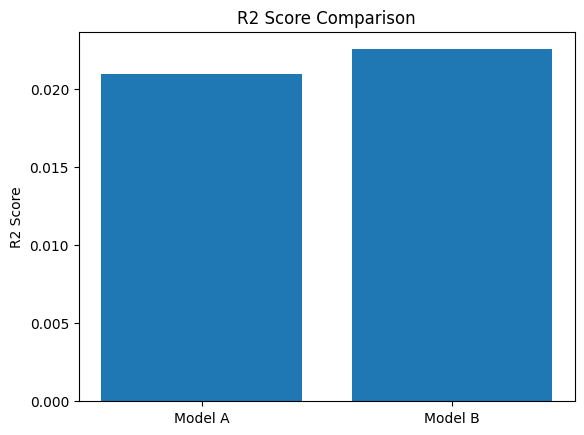

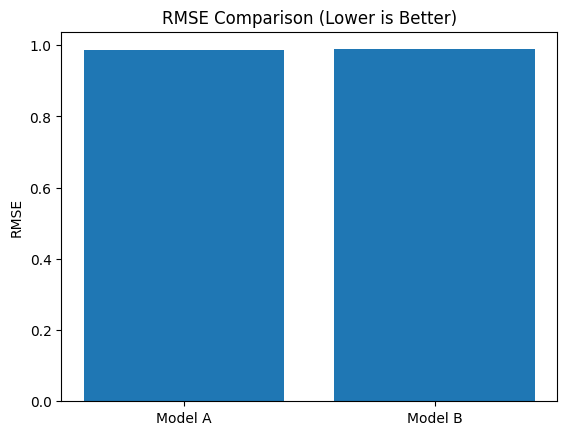

In [155]:

# R2 bar chart
plt.figure()
plt.bar(["Model A","Model B"], [r2_none, np.mean(r2_scores_kf)])
plt.title("R2 Score Comparison")
plt.ylabel("R2 Score")
plt.show()

# RMSE bar chart
plt.figure()
plt.bar(["Model A","Model B"], [rmse_none, np.mean(rmse_kf)])
plt.title("RMSE Comparison (Lower is Better)")
plt.ylabel("RMSE")
plt.show()

In [158]:
!curl -L -o all.zip "https://github.com/VaradRane12/aiml/archive/1.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100  4650    0  4650    0     0   3782      0 --:--:--  0:00:01 --:--:--  3782
